# Flagship vs Pancan Part 2: Cis Effect

This notebook graphs the pearson correlation between EGFR copy number and EGFR proteomics for both the flagship and harmonized pipeline. It shows how an EGFR copy number mutation effects protein levels of EGFR (cis effect). 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 

import cptac
import cptac.utils as u
import plot_utils as p
import cptac.pancan as pc

/Users/Lindsey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
'''
@Param df1: Dataframe. Contains numeric values (such as proteomics) for pearson correlaton 
@Param x_axis: String. Used as the label for the x-axis as well as the column name for the x-axis values.
@Param y_axis:String. Used as the label for the y-axis as well as the column name for the y-axis values.
This fuction takes a dataframe with numeric values (such as proteomics) and performs a pearson correlation analysis
between two user specified columns within the dataframe. 
The function then prints the uncorrected pvalue and coorelation value.

'''
def print_stats(df1, x_axis, y_axis):
      
    df1_subset = df1[[x_axis,y_axis]]
    df1_subset = df1_subset.dropna(axis=0, how="any")
    count_row = df1_subset.shape[0]
    if count_row > 30:
        x1 = df1_subset[[x_axis]].values
        y1 = df1_subset[[y_axis]].values
        x1 = x1[:,0]
        y1 = y1[:,0]
        corr, pval = scipy.stats.pearsonr(x1,y1)
        print("Correlation: " + str(corr))
        print("P_value:" + str(pval))
        
    else: 
        return "Not Enough Data"

# Part 1: Flagship pipeline

load cptac data

In [4]:
en = cptac.Endometrial()
hn = cptac.Hnscc()
l = cptac.Luad()
o = cptac.Ovarian()
c = cptac.Ccrcc()
col = cptac.Colon()
g = cptac.Gbm()
b = cptac.Brca()
ls = cptac.Lscc()

In [5]:
import cptac.pancan as pc
pc_g = pc.PancanGbm()
pc_hn = pc.PancanHnscc()
pc_l = pc.PancanLuad()
#o = pc.PancanOv()
pc_c = pc.PancanCcrcc()
#col = pc.PancanCoad()
pc_b = pc.PancanBrca()
pc_ls = pc.PancanLscc()
pc_en = pc.PancanUcec()

# GBM Flagship

In [6]:
#Join proteomics and CNV data together
prot_CNV_Tumor = g.join_omics_to_omics(df1_name="proteomics", df2_name="CNV",genes1="EGFR", genes2= "EGFR", tissue_type= "tumor")
#Example of df 
prot_CNV_Tumor.head()


Name,EGFR_proteomics,EGFR_CNV
Patient_ID,,
C3L-00104,1.054962,1.059405
C3L-00365,2.219562,4.071536
C3L-00674,0.137329,3.483884
C3L-00677,-0.768478,0.458499
C3L-01040,-1.249435,0.360617


Use plot_pearson function in plot_utils to graph pearson correlation.

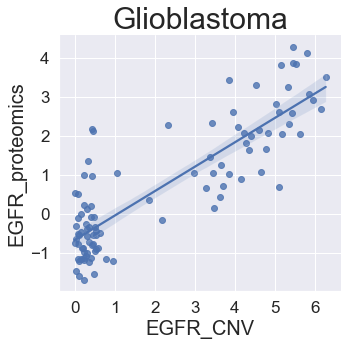

In [7]:
p.plot_pearson(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics", hue = "none", title = "Glioblastoma", ra_stats = False ,show_plot = True, save_file_name = "png_files/cis_flagship_Gbm")

# GBM Harmonized

In [8]:
harmonized_CNV_Tumor = pc_g.join_omics_to_omics(df1_name = "proteomics", df1_source = "umich", df2_name = "CNV", df2_source = "washu", genes1 = "EGFR", genes2 = "EGFR", tissue_type = "tumor")
drop = ['Database_ID']
harmonized_CNV_Tumor = u.reduce_multiindex(df=harmonized_CNV_Tumor, levels_to_drop=drop)    


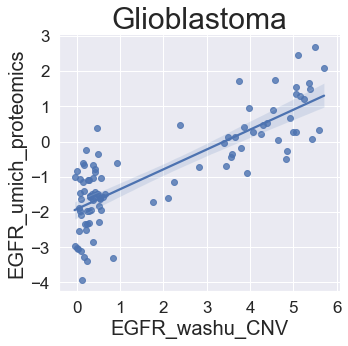

In [9]:
p.plot_pearson(harmonized_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics", hue = "none", title = "Glioblastoma", ra_stats = False ,show_plot = True, save_file_name = "png_files/cis_pancan_Gbm")

# ccRCC Flagship 

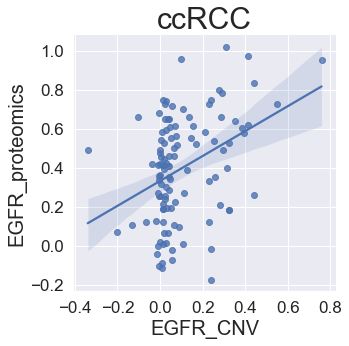

Correlation: 0.3761403530200309
P_value:5.12862395274026e-05


In [11]:
prot_CNV_Tumor = c.join_omics_to_omics(df1_name="proteomics", df2_name="CNV", tissue_type= "tumor")
prot_CNV_Tumor.columns = prot_CNV_Tumor.columns.droplevel(1) #drop multi-index level
p.plot_pearson(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics", hue ="none", ra_stats = False, show_plot = True, title = "ccRCC", save_file_name = "png_files/cis_flagship_Kidney")
print_stats(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics")

# ccRCC Harmonized

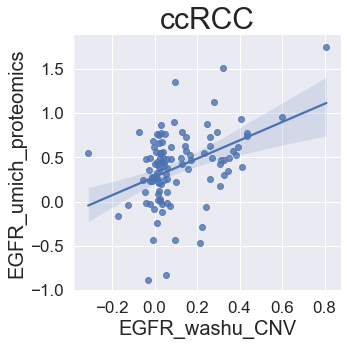

Correlation: 0.42001008878782436
P_value:4.926998084178914e-06


In [13]:
prot_CNV_Tumor = pc_c.join_omics_to_omics(df1_name = "proteomics", df1_source = "umich", df2_name = "CNV", df2_source = "washu", genes1 = "EGFR", genes2 = "EGFR", tissue_type = "tumor")
drop = ['Database_ID']
prot_CNV_Tumor = u.reduce_multiindex(df=prot_CNV_Tumor, levels_to_drop=drop)
p.plot_pearson(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics", hue ="none", ra_stats = False, show_plot = True, title = "ccRCC", save_file_name = "png_files/cis_pancan_Kidney")
print_stats(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics")

# Brca Flagship

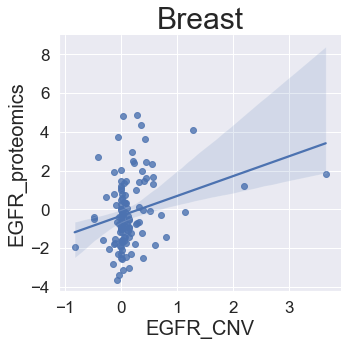

Correlation: 0.2717791141678874
P_value:0.003301432638642013


In [16]:
prot_CNV_Tumor = b.join_omics_to_omics(df1_name="proteomics", df2_name="CNV", tissue_type= "tumor")
prot_CNV_Tumor.columns = prot_CNV_Tumor.columns.droplevel(1) #drop multi-index level
p.plot_pearson(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics", hue = "none", ra_stats = False, title = "Breast", show_plot = True, save_file_name = "png_files/cis_flagship_Brca")
print_stats(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics")

# Brca Harmonized

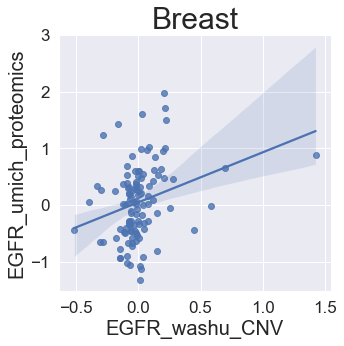

Correlation: 0.28731817095336276
P_value:0.0021290314103199664


In [17]:
prot_CNV_Tumor = pc_b.join_omics_to_omics(df1_name = "proteomics", df1_source = "umich", df2_name = "CNV", df2_source = "washu", genes1 = "EGFR", genes2 = "EGFR", tissue_type = "tumor")
drop = ['Database_ID']
prot_CNV_Tumor = u.reduce_multiindex(df=prot_CNV_Tumor, levels_to_drop=drop)
p.plot_pearson(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics", hue = "none", ra_stats = False, title = "Breast", show_plot = True, save_file_name = "png_files/cis_pancan_brca")
print_stats(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics")

# LUAD Flagship

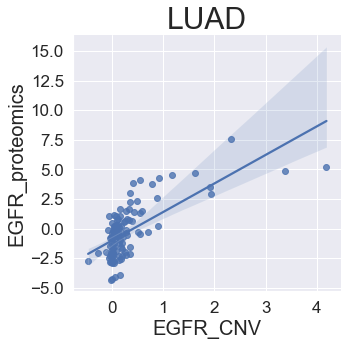

Correlation: 0.6881251124110952
P_value:1.375121355381228e-16


In [19]:
prot_CNV_Tumor = l.join_omics_to_omics(df1_name="proteomics", df2_name="CNV", tissue_type= "tumor")
prot_CNV_Tumor.columns = prot_CNV_Tumor.columns.droplevel(1) #drop multi-index level
p.plot_pearson(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics", hue = 'none', title = "LUAD", ra_stats = False, show_plot = True, save_file_name = "png_files/cis_flagship_Luad")
print_stats(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics")

# LUAD Harmonized

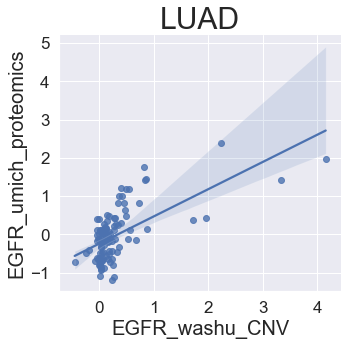

Correlation: 0.6330153861249752
P_value:1.5229599308436397e-13


In [20]:
prot_CNV_Tumor = pc_l.join_omics_to_omics(df1_name = "proteomics", df1_source = "umich", df2_name = "CNV", df2_source = "washu", genes1 = "EGFR", genes2 = "EGFR", tissue_type = "tumor")
drop = ['Database_ID']
prot_CNV_Tumor = u.reduce_multiindex(df=prot_CNV_Tumor, levels_to_drop=drop)
p.plot_pearson(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics", hue = 'none', title = "LUAD", ra_stats = False, show_plot = True, save_file_name = "png_files/cis_pancan_Luad")
print_stats(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics")

# HNSCC flagship 

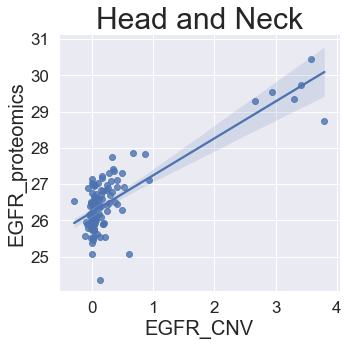

Correlation: 0.807644126618269
P_value:7.850887605030991e-26


In [21]:
prot_CNV_Tumor = hn.join_omics_to_omics(df1_name="proteomics", df2_name="CNV", tissue_type= "tumor")
p.plot_pearson(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics", hue = "none", title = "Head and Neck", ra_stats = False, show_plot = True, save_file_name = "png_files/cis_flagship_Hnscc")
print_stats(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics")

# HNSCC Harmonized

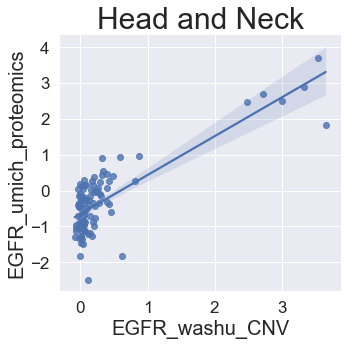

Correlation: 0.8100066646304529
P_value:8.715448742742983e-27


In [23]:
prot_CNV_Tumor = pc_hn.join_omics_to_omics(df1_name = "proteomics", df1_source = "umich", df2_name = "CNV", df2_source = "washu", genes1 = "EGFR", genes2 = "EGFR", tissue_type = "tumor")
drop = ['Database_ID']
prot_CNV_Tumor = u.reduce_multiindex(df=prot_CNV_Tumor, levels_to_drop=drop)
p.plot_pearson(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics", hue = "none", title = "Head and Neck", ra_stats = False, show_plot = True, save_file_name = "png_files/cis_pancan_hnscc")
print_stats(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics")

# LSCC Flagship

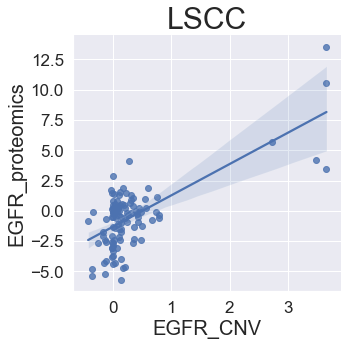

Correlation: 0.6990568515753115
P_value:3.984133514127741e-17


In [24]:
prot_CNV_Tumor = ls.join_omics_to_omics(df1_name="proteomics", df2_name="CNV", tissue_type= "tumor")
prot_CNV_Tumor.columns = prot_CNV_Tumor.columns.droplevel(1) #drop multi-index level
p.plot_pearson(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics", hue = "none", title = "LSCC" , ra_stats = False, show_plot = True, save_file_name = "png_files/cis_flagship_Lscc")
print_stats(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics")

# LSCC Harmonized

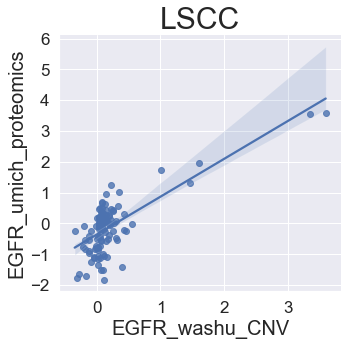

Correlation: 0.7362846816319715
P_value:4.951566424145093e-20


In [27]:
prot_CNV_Tumor = pc_ls.join_omics_to_omics(df1_name = "proteomics", df1_source = "umich", df2_name = "CNV", df2_source = "washu", genes1 = "EGFR", genes2 = "EGFR", tissue_type = "tumor")
drop = ['Database_ID']
prot_CNV_Tumor = u.reduce_multiindex(df=prot_CNV_Tumor, levels_to_drop=drop)
p.plot_pearson(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics", hue = "none", title = "LSCC" , ra_stats = False, show_plot = True, save_file_name = "png_files/cis_pancan_Lscc")
print_stats(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics")

# Ovarian Flagship

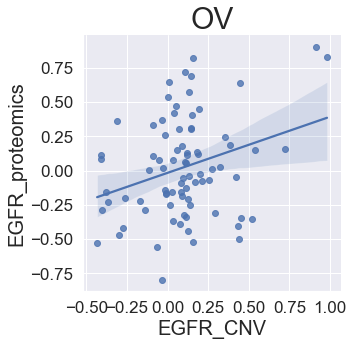

Correlation: 0.3021737315261447
P_value:0.006112209575176951


In [29]:
prot_CNV_Tumor = o.join_omics_to_omics(df1_name="proteomics", df2_name="CNV", tissue_type= "tumor")
prot_CNV_Tumor.columns = prot_CNV_Tumor.columns.droplevel(1) #drop multi-index level
p.plot_pearson(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics", hue = "none", ra_stats = False,title = "OV", show_plot = True, save_file_name = "cis_flagship_Ovarian")
print_stats(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics")

# Colon Flagship

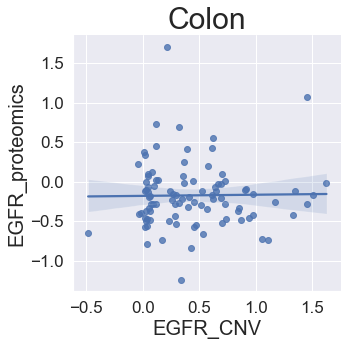

Correlation: 0.3021737315261447
P_value:0.006112209575176951


In [30]:
prot_CNV = col.join_omics_to_omics(df1_name="proteomics", df2_name="CNV", tissue_type= "tumor")
p.plot_pearson(prot_CNV,"EGFR_CNV","EGFR_proteomics",hue = "none", ra_stats = False, title = "Colon", show_plot = True, save_file_name = "png_files/cis_flagship_Colon")
print_stats(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics")